<a href="https://colab.research.google.com/github/snehalramteke27/Soeul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Import Libraries and Data**

In [ ]:
from seaborn.rcmod import set_style
# Importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')

import datetime as dt
from datetime import datetime

# Importing Models libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

In [ ]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the csv file
df=pd.read_csv('/content/drive/MyDrive/Bike sharing Demand Prediction/SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
# Check 1st Five rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Check last 5 rows
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Getting the shape of dataset with rows and columns
df.shape

(8760, 14)

In [ ]:
#Getting all the columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Check the info of dataset to know the data types of columns or variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Describing the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
#print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#Looking for the description of the dataset to get insights of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


This Dataset contains 8760 lines and 14 columns

# **Missing values**

In [ ]:
#finding the null values
df.isna().sum()
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

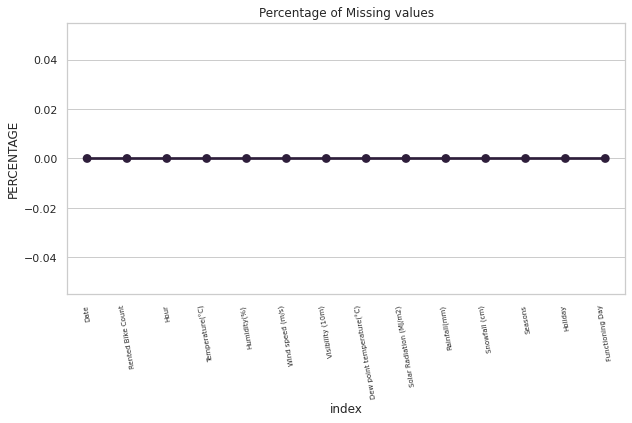

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(10,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =100,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
# Checking Duplicate Values

print(len(df[df.duplicated()]))

0


**Obeservations:**
We don't have any missing and duplicate values is the dataset.

# **Data Cleaning**

In [ ]:
#Since the variables having units with name, renaming columns for better variable analysis.
df.rename(columns={'Date':'Date','Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [ ]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

#Changing data type

In [ ]:
# Changing the "Date" column into three "year","month","day" column
df['Date'] = df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day','year'],axis=1)

In [ ]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [ ]:
#let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [ ]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

# Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

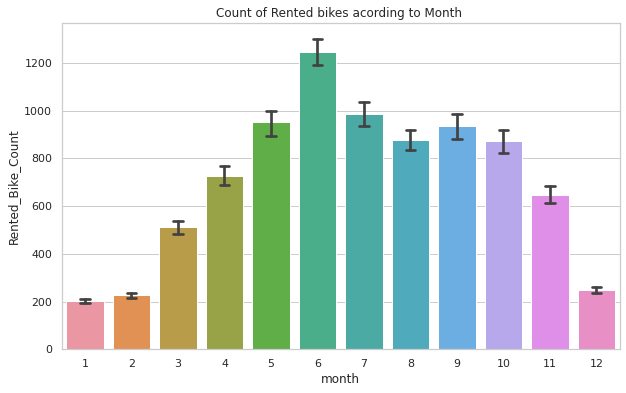

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

# weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

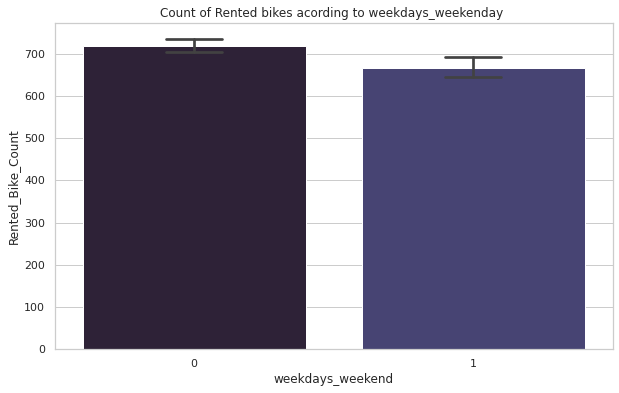

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

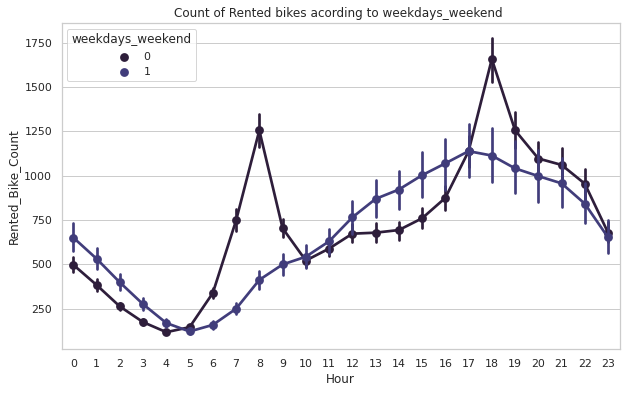

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

# Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

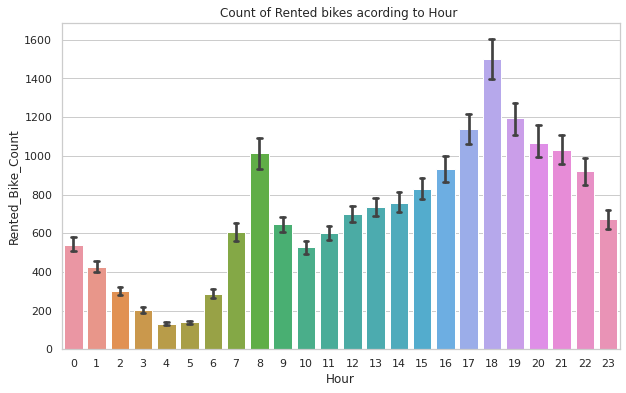

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

# Functioning Day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

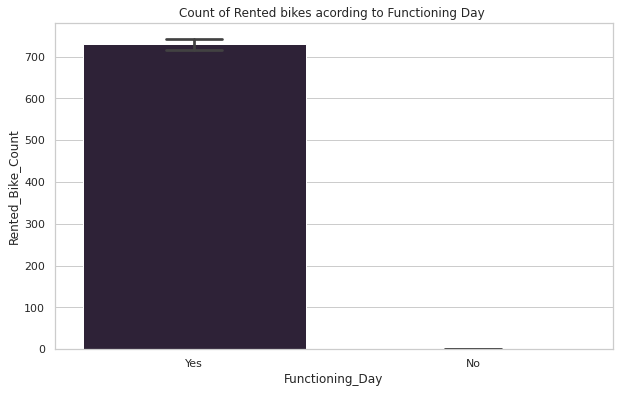

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

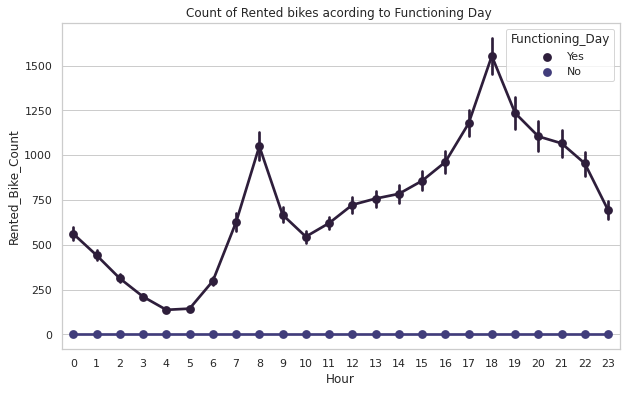

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

# Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

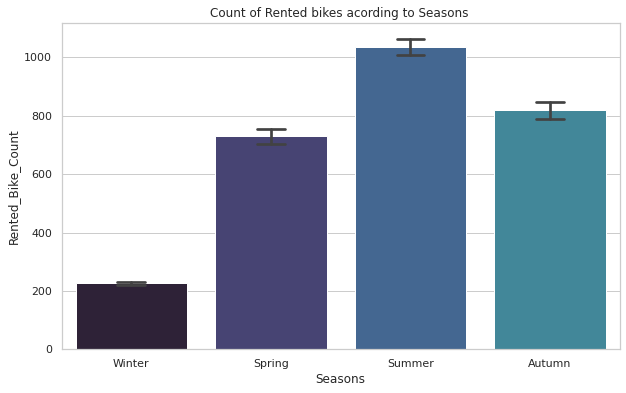

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

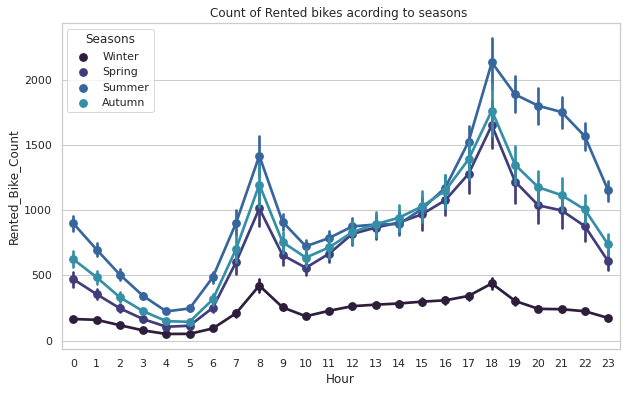

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

# Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

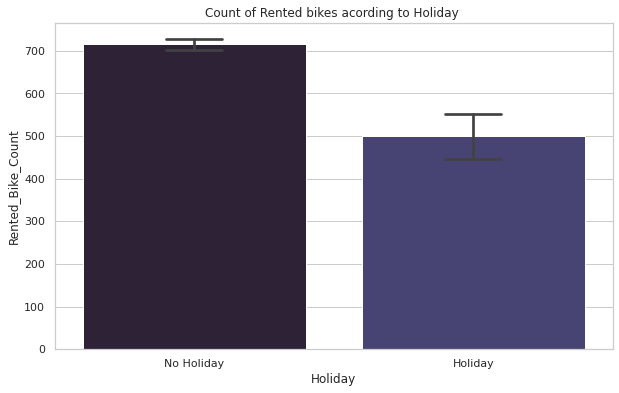

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

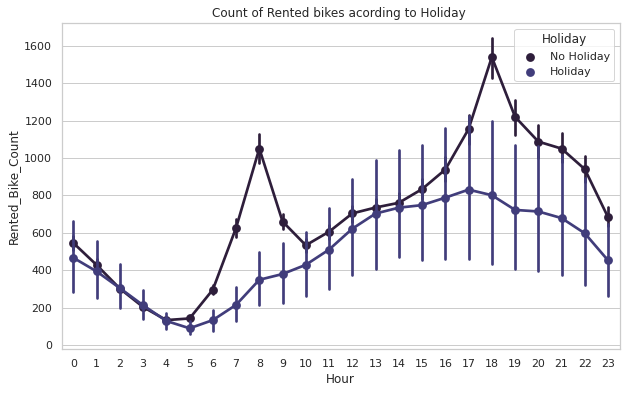

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

# **Analyze of Numerical variables**

**Visualizing numerical variables distplot **

In [ ]:
#assign the numerical coulmn to variavle
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'month', 'weekdays_weekend'],
      dtype='object')

In [ ]:
#assigning numerical coulmn to variable
num_feat= list(set(df.describe()))
num_feat

['Wind_speed',
 'month',
 'Hour',
 'Rainfall',
 'Solar_Radiation',
 'Temperature',
 'weekdays_weekend',
 'Rented_Bike_Count',
 'Visibility',
 'Dew_point_temperature',
 'Humidity',
 'Snowfall']

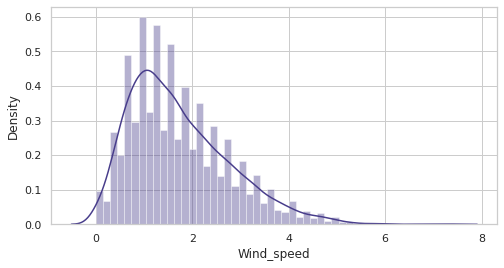

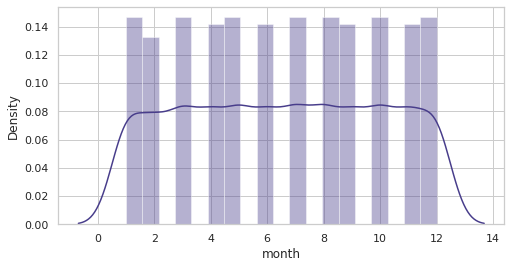

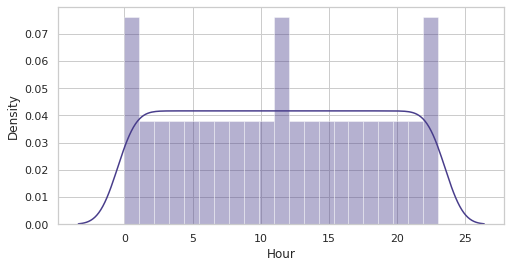

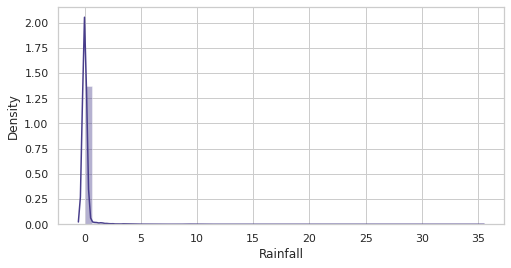

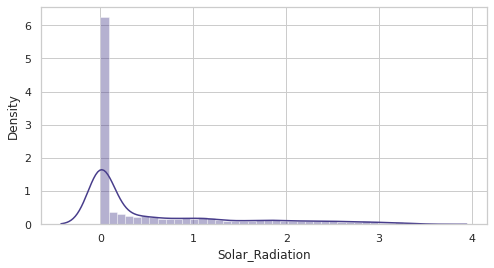

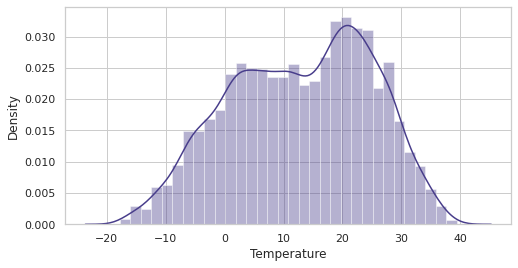

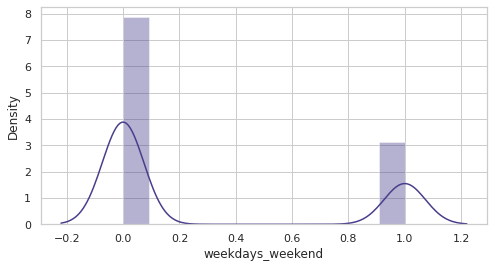

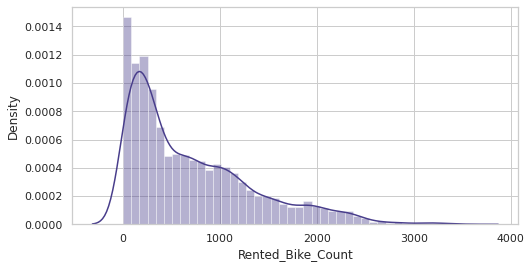

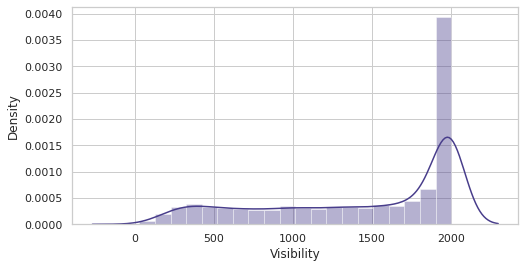

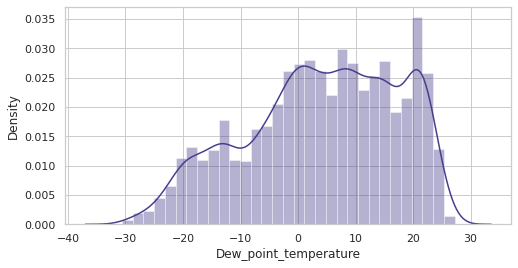

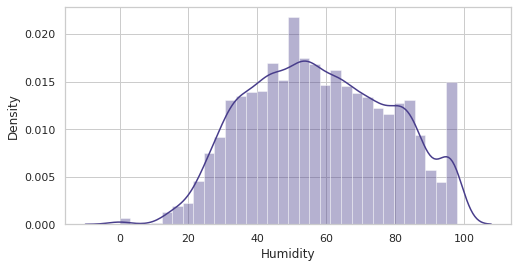

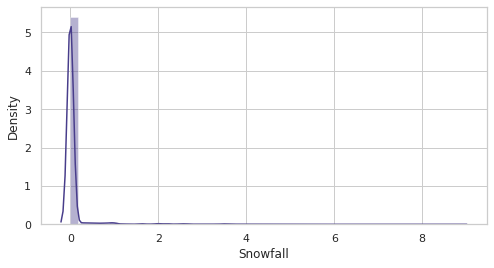

In [ ]:
#plotting distplots to analyze the distribution of all numerical features
for col in num_feat:
  plt.figure(figsize=(8,4))
  sns.distplot(x=df[col],color= 'darkslateblue')
  plt.xlabel(col)
plt.show()

#analyze the relationship

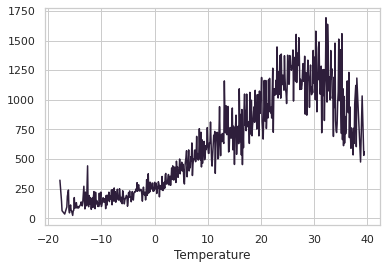

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

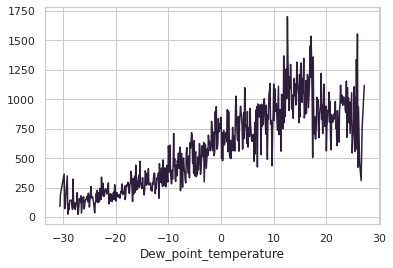

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

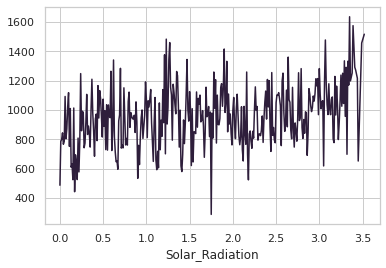

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

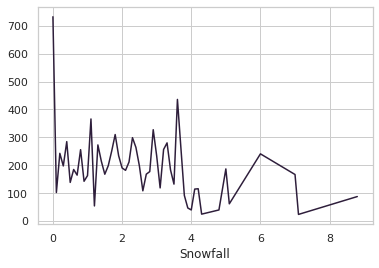

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

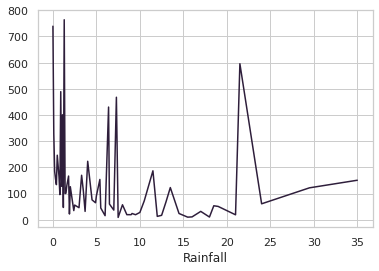

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

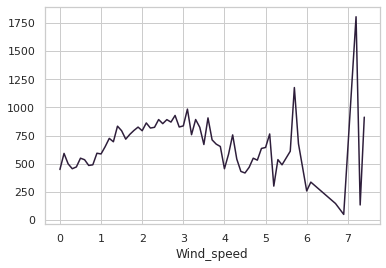

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

# Regression plot

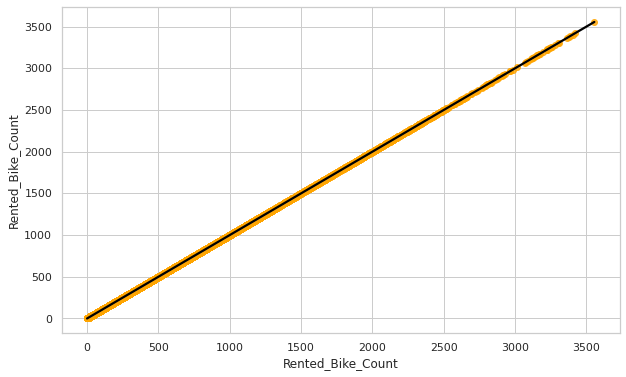

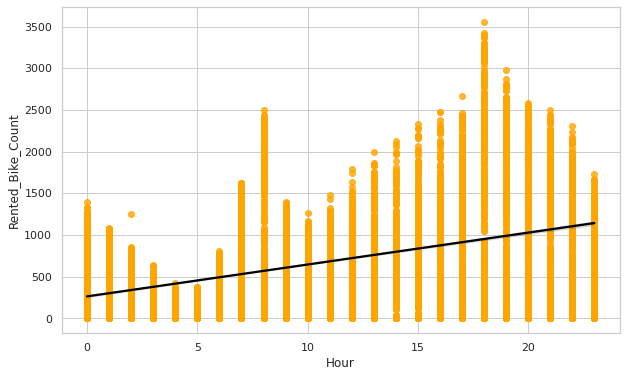

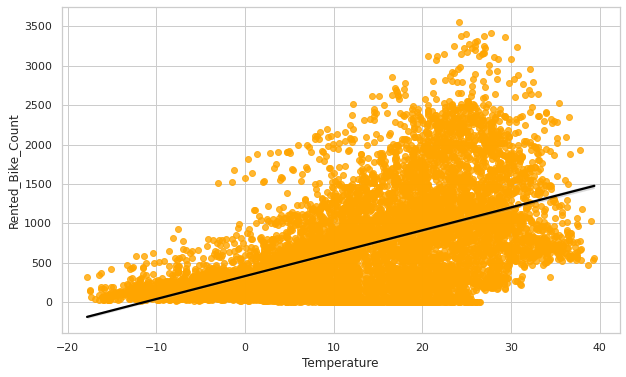

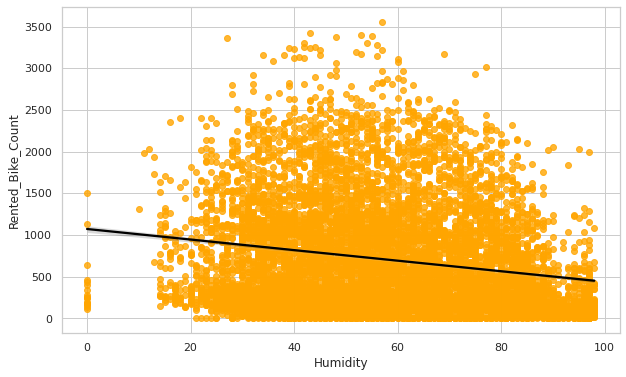

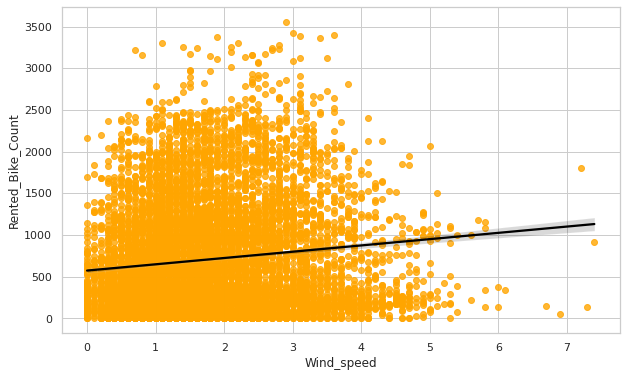

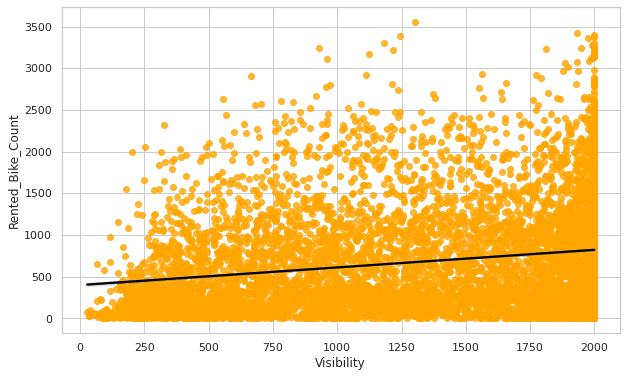

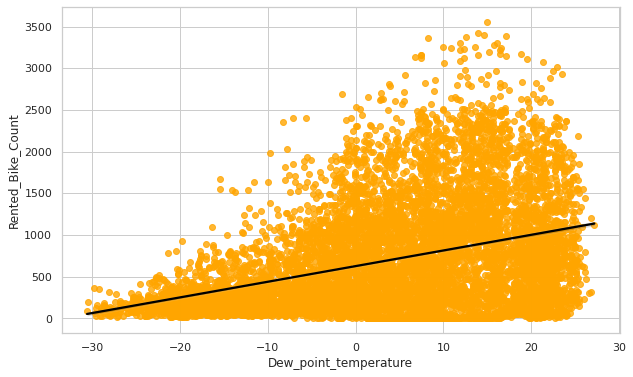

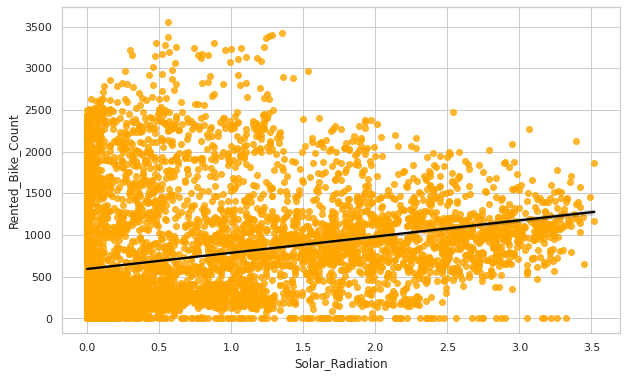

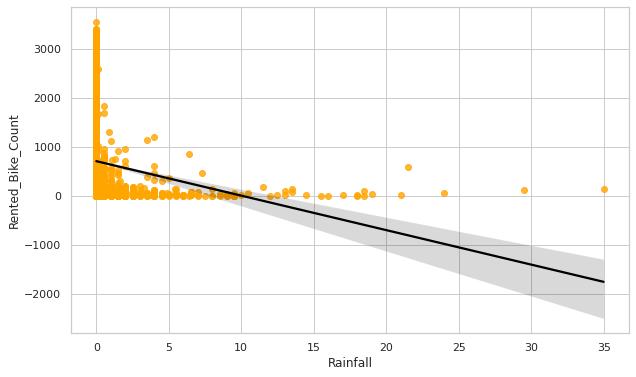

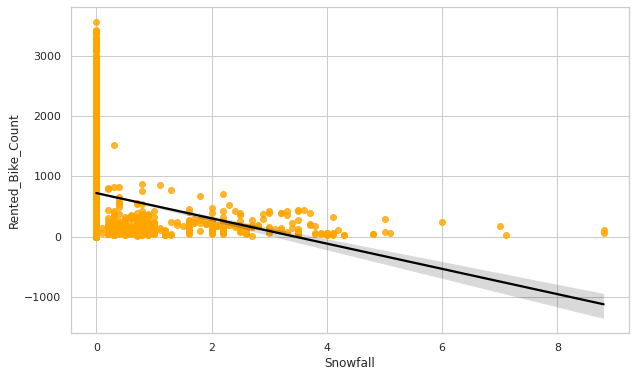

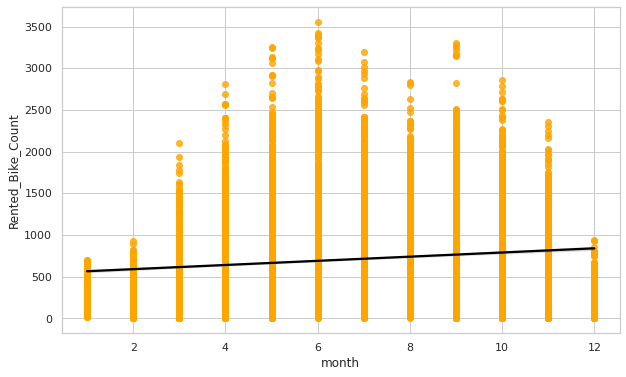

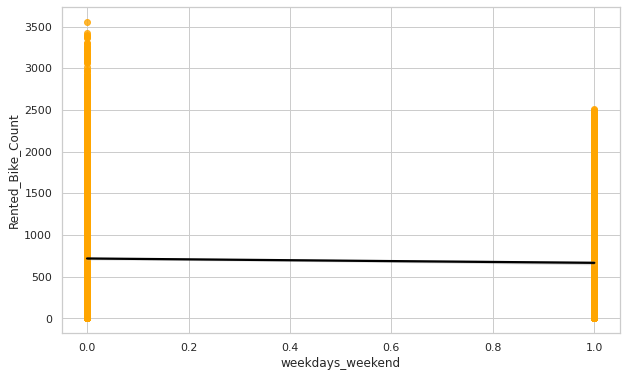

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

# Normalise Rented_Bike_Count column data

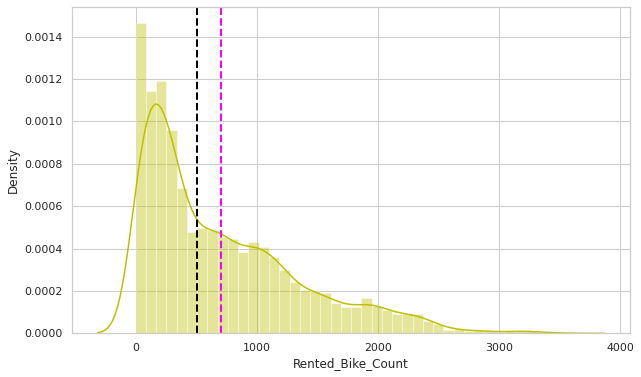

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

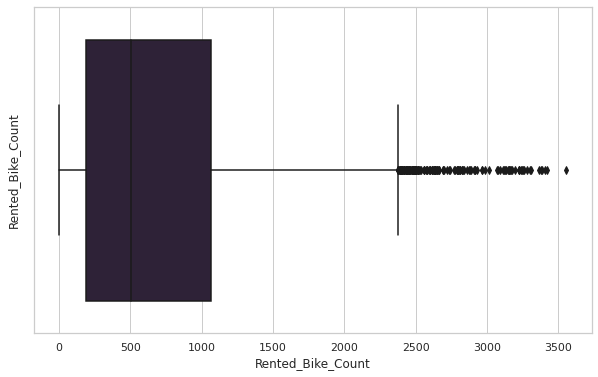

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

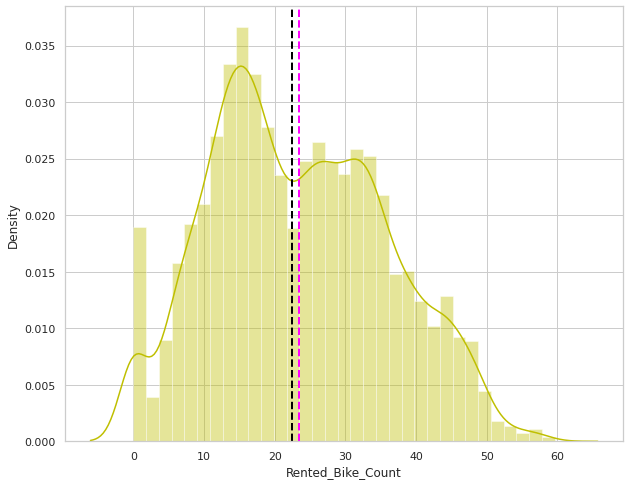

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

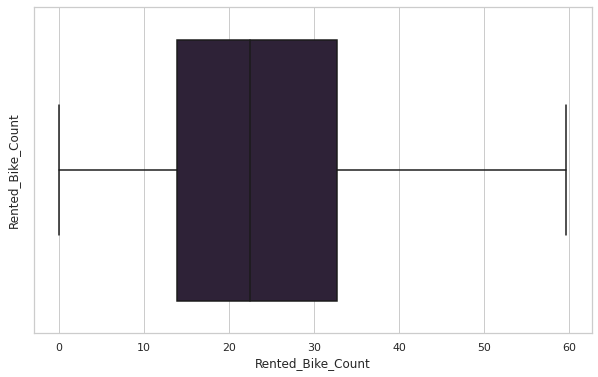

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

# **Checking of Correlation between variables**

#Checking in OLS Model

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = df['Rented_Bike_Count']
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:58:00   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



*  R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is explained by the model.
*   For F statistic , P value is less than 0.05 for 5% levelof significance.


*  P value of dew point temp and visibility are very high and they are not significant.
*  Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.
* The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems

* Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.





# **Heatmap**

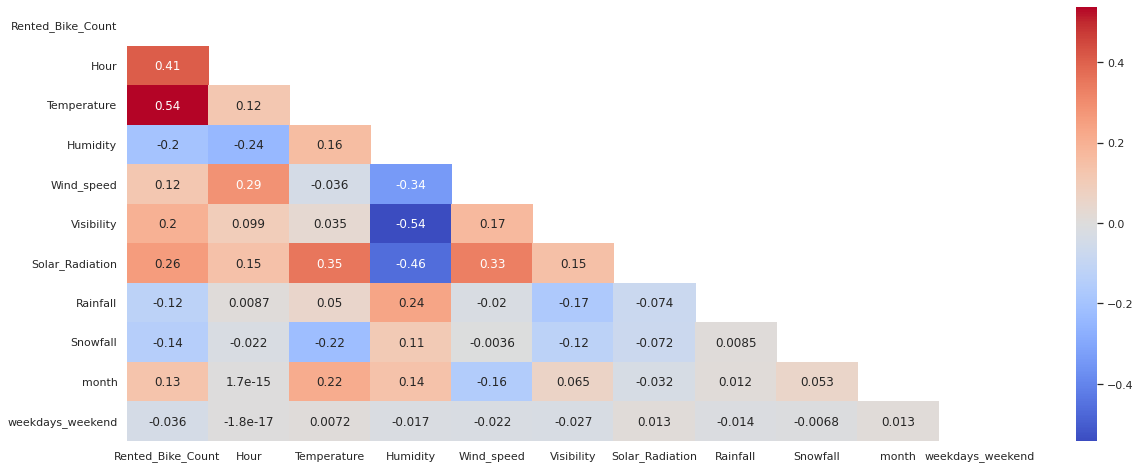

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

***From the above correlation heatmap, We see that there is a positive
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.

# Creating dummy variables and performing the one hot encoding to the dataset

**Train Test split for regression**

In [ ]:
#Changing the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


# one hot encoding

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
df1 = pd.get_dummies(df,drop_first=True,sparse=True)
df1.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Model Training**

# Train Test split for regression

In [ ]:
# Data spliting and value assigning to variables for Reggression

X = df1.drop(columns = ['Rented_Bike_Count'] , axis = 1)
y = np.sqrt(df1['Rented_Bike_Count'])

In [ ]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
df.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')



*   The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.
*   MSE formula = (1/n) * Σ(actual – forecast)2

where:

*   n = number of items,
*   Σ = summation notatioon,
*   Actual = original or observed y-value,
*   Forecast = y-value from regression.
*   Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
*   Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.
*  R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 
*   Formula for R-Squared
      
R2 = 1- unexplained variation / total variation

*  R2 =1− Total Variation Unexplained Variation​
*  Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. 










# **Implementing Linear Regression.**

In [ ]:
# Train test spliting

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape

(6570, 47)


(2190, 47)

In [ ]:
# initalizing the model
regg = LinearRegression().fit(X_train,y_train)

In [ ]:
# Checking score
regg.score(X_train,y_train)

0.7722101548255267

In [ ]:
#Checking Coefficent
regg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [ ]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train)
y_pred_test = regg.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 35.07751288189292
RMSE : 5.9226271942350825
MAE : 4.474024092996788
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

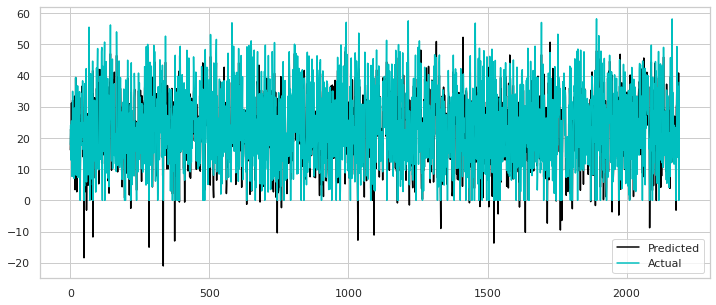

In [ ]:
#Plotting the figure
plt.figure(figsize=(12,5))
plt.plot(y_pred_test, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

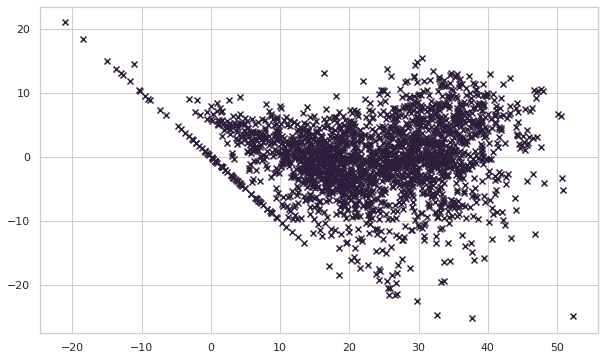

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,6))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')

# **Implementing Lasso regression (L1 Regularization)**

In [ ]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

0.3873692800799008
0.40519624904934015


In [ ]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


In [ ]:
dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

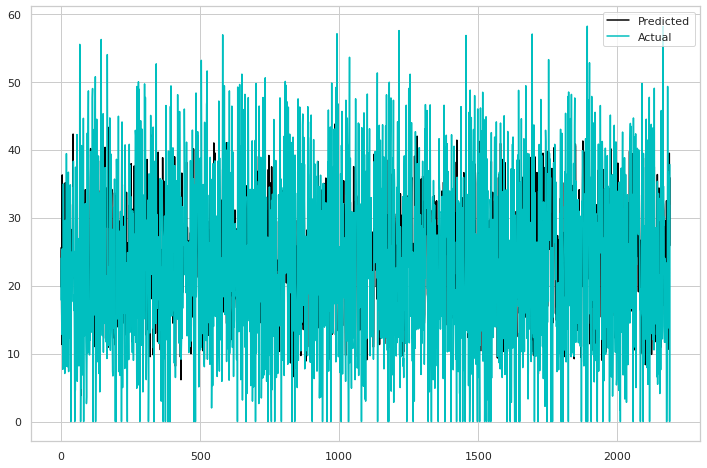

In [ ]:
#Plotting the figure
plt.figure(figsize=(12,8))
plt.plot(y_pred_test_lasso, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

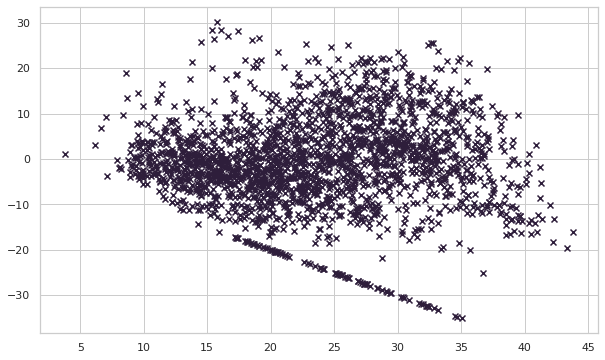

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,6))
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso),marker='x')

# **Implementing Ridge regression (L2 Regularization)**

In [ ]:

# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#checking score

ridge.score(X_train,y_train)

0.7722100789802107

In [ ]:
# Predicted Train & Test values

y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
 #Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125378
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 33.27678426818438
RMSE : 5.768603320404722
MAE : 4.410414932539515
R2 : 0.7893426477812578
Adjusted R2 : 0.7847203809491939


In [ ]:
dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

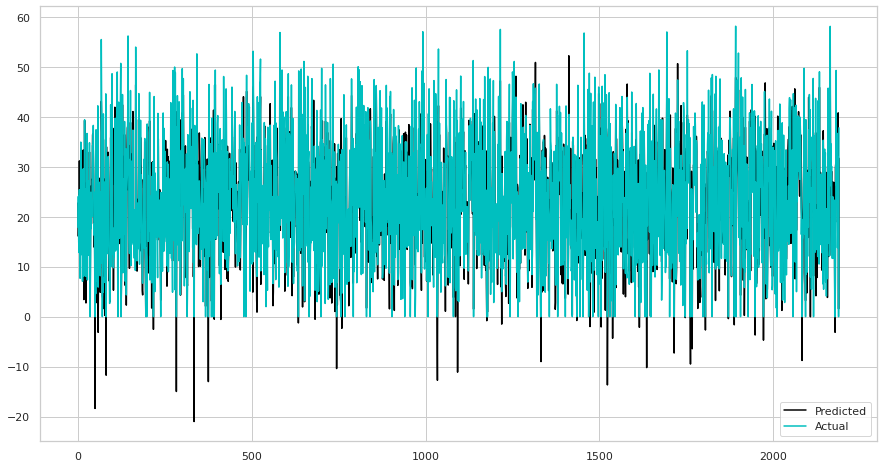

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,8))
plt.plot(y_pred_test_ridge, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

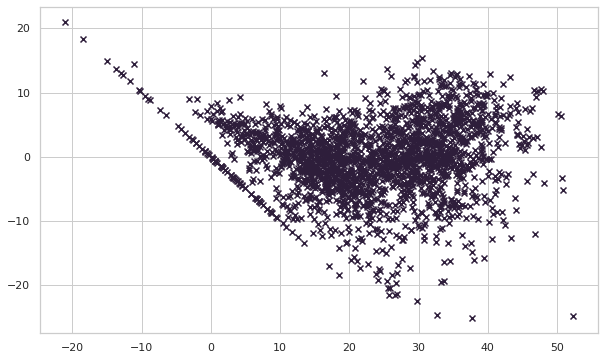

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,6))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),marker='x')

# **Implementing Elastic Net Regression**

In [ ]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#checking score
elnet.score(X_train, y_train)

0.6261189054494012

In [ ]:
# Train Test values
y_pred_train_en=elnet.predict(X_train)
y_pred_test_en=elnet.predict(X_test)

In [ ]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 57.5742035398887
RMSE : 7.587766703048315
MAE : 5.792276538970546
R2 : 0.6261189054494012
Adjusted R2 : 0.6179151652795234


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 59.45120536350042
RMSE : 7.710460775044538
MAE : 5.873612334800099
R2 : 0.6236465216363589
Adjusted R2 : 0.6153885321484546


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

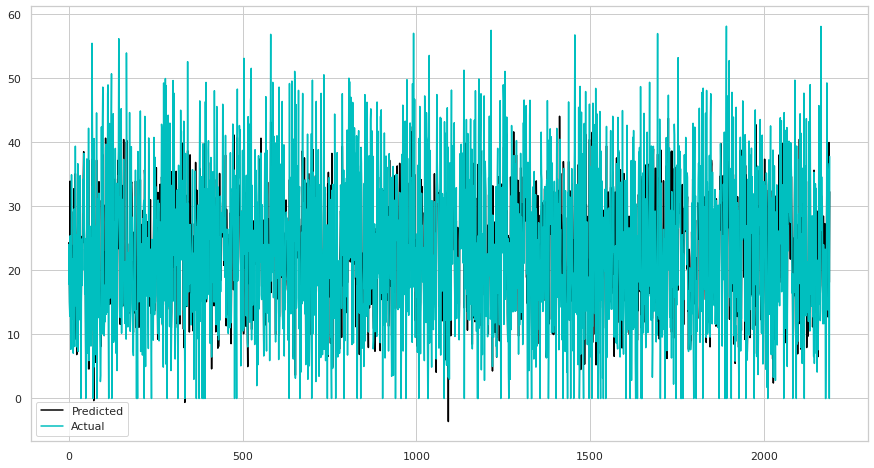

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,8))
plt.plot(np.array(y_pred_test_en), color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

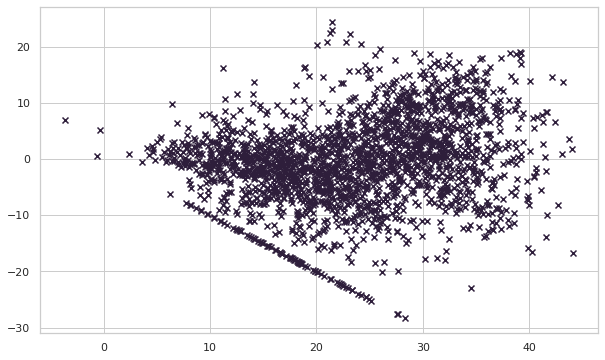

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,6))
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),marker='x')

# **Implementing Decision Tree Regression**

In [ ]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [ ]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 53.078817949978166
RMSE : 7.28552111725566
MAE : 5.356725824609614
R2 : 0.655311487915927
Adjusted R2 : 0.6477482946068926


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 57.92525668962241
RMSE : 7.610864385181384
MAE : 5.536122058914314
R2 : 0.6333064787004248
Adjusted R2 : 0.6252604490547291


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

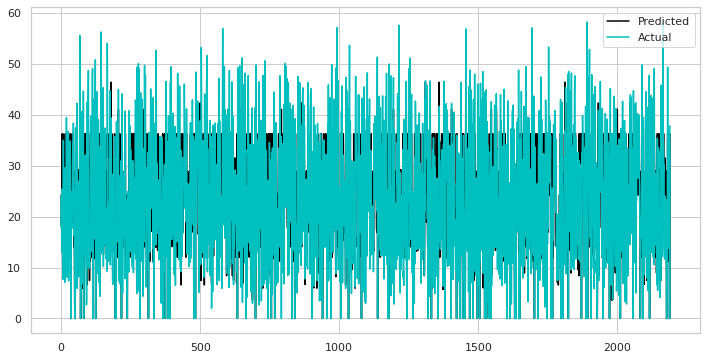

In [ ]:
#Plotting the figure
plt.figure(figsize=(12,6))
plt.plot(y_pred_test_d, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

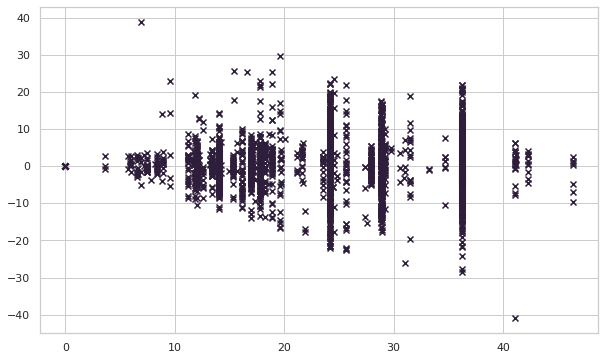

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,6))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')

# **Implementng Random Forest Regression**

In [ ]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 1.5911371949703914
RMSE : 1.261402867830255
MAE : 0.8071021555714909
R2 : 0.9896673148830701
Adjusted R2 : 0.989440593967806


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 12.860999341569732
RMSE : 3.586223548744519
MAE : 2.2273570307945136
R2 : 0.9185839579225097
Adjusted R2 : 0.9167975181570373


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# Feature importances
rf_model.feature_importances_

array([3.14971344e-01, 1.57382707e-01, 1.20120448e-02, 1.21428744e-02,
       2.96863460e-02, 3.29567404e-02, 1.46486428e-03, 4.76106212e-03,
       1.39289438e-02, 2.11131422e-02, 3.08473472e-02, 2.56531315e-02,
       7.85860691e-03, 4.15057537e-03, 1.32941768e-02, 1.03847636e-03,
       2.15967051e-03, 1.07935277e-03, 2.48414412e-04, 2.58831943e-04,
       4.26186526e-04, 1.53952724e-03, 3.68700724e-03, 1.05710701e-02,
       3.12385067e-02, 1.76146817e-02, 1.16217111e-02, 1.21499158e-02,
       9.51033631e-03, 3.74861486e-03, 3.93423377e-03, 8.70670858e-04,
       9.10720334e-03, 3.78563028e-03, 1.51781437e-01, 3.51756949e-04,
       3.88124452e-03, 1.32563497e-03, 1.40750985e-03, 2.23976087e-03,
       8.48270468e-04, 2.92845568e-03, 8.43425981e-04, 2.84525756e-03,
       4.96423421e-03, 7.69715325e-04, 1.89993479e-02])

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.style.use('dark_background')

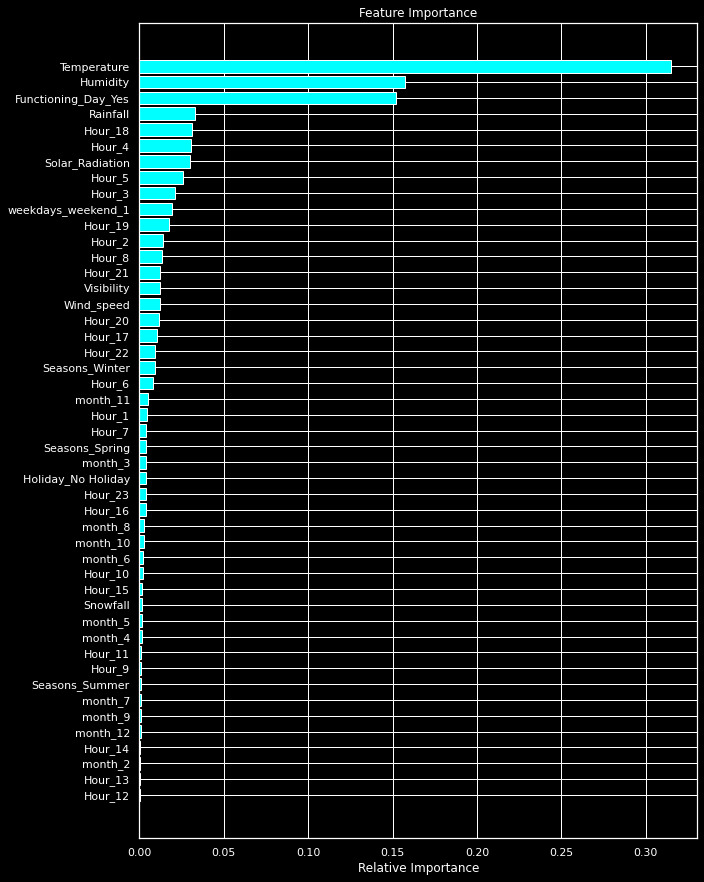

In [ ]:
#Plotting figure
plt.figure(figsize=(10,15))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Implementing XG Boost Regression**

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
df1 = pd.get_dummies(df,drop_first=True,sparse=False) 
X = df1.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df1['Rented_Bike_Count'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
# Initializing the model
xgb_r = xgb.XGBRegressor()

In [ ]:
#Fitting the model
xgb_r.fit(X_train, y_train)

[14:08:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Train Test values
y_pred_train_xgb = xgb_r.predict(X_train)
y_pred_test_xgb = xgb_r.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 18.94004636700085
RMSE : 4.352016356472118
MAE : 3.2880211940664967
R2 : 0.8770052413903169
Adjusted R2 : 0.87430647684566


R2 score value is 0.86 it means that our model is able to capture most of the data variance.

In [ ]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 21.639539065193013
RMSE : 4.651831796743409
MAE : 3.5084702656323183
R2 : 0.8630117632169776
Adjusted R2 : 0.8600059522324761


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# Feature importances
xgb_r.feature_importances_

array([0.06877253, 0.04353457, 0.00322337, 0.00277841, 0.036539  ,
       0.05546211, 0.00050233, 0.00689611, 0.0230494 , 0.03375693,
       0.03561029, 0.03742076, 0.0237572 , 0.        , 0.01896812,
       0.        , 0.01326785, 0.00934486, 0.        , 0.        ,
       0.        , 0.        , 0.00717166, 0.02030421, 0.05545485,
       0.04573243, 0.02964139, 0.04010298, 0.04355112, 0.00561928,
       0.00227708, 0.        , 0.07622997, 0.00782924, 0.14921398,
       0.        , 0.00846051, 0.00240816, 0.00943578, 0.01746734,
       0.        , 0.01426272, 0.        , 0.02052754, 0.0153357 ,
       0.00438016, 0.0117099 ], dtype=float32)

In [ ]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

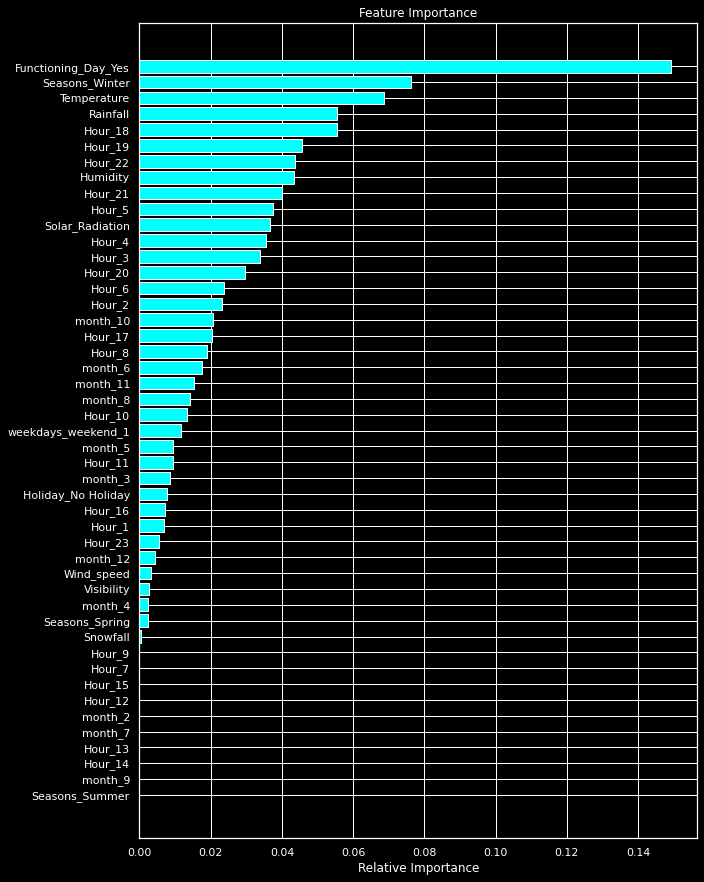

In [ ]:
#Plotting figure
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Hyperparameter tuning**

# *For improvement of our model let's do some Hyper parameter tuning.

# XG boost Regressor with GridSearchCV

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
# Create an instance of the XG Boost Regressor
xg_boost = xgb.XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[14:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[14:08:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[14:08:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[14:08:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[14:08:47] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_grid.best_estimator_

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
xg_optimal_model = xg_grid.best_estimator_

In [ ]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(X_train)
y_pred_test_xg_opt= xg_optimal_model.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 3.065641328737999
RMSE : 1.7508972924583552
MAE : 1.1751693698343137
R2 : 0.980092033149985
Adjusted R2 : 0.9796552103479539


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 11.146770725459602
RMSE : 3.338677990681282
MAE : 2.203468484233655
R2 : 0.9294358136323962
Adjusted R2 : 0.9278874864805394


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
xg_optimal_model.feature_importances_

array([0.02223317, 0.01734574, 0.00110658, 0.00143481, 0.00641155,
       0.02795362, 0.00194597, 0.006159  , 0.03511088, 0.04752083,
       0.0585263 , 0.04925276, 0.02825743, 0.00905176, 0.02422243,
       0.00309476, 0.01237568, 0.00827377, 0.00201094, 0.00204395,
       0.00202099, 0.00178301, 0.00541877, 0.03166145, 0.07063802,
       0.04079454, 0.05040542, 0.03765666, 0.03717411, 0.01206468,
       0.00765646, 0.00598512, 0.05517572, 0.0036773 , 0.18513289,
       0.00060871, 0.00516107, 0.00131219, 0.00597454, 0.01481875,
       0.00166303, 0.02025007, 0.00133842, 0.01367327, 0.01261591,
       0.00295092, 0.00805615], dtype=float32)

In [ ]:
xg_optimal_model.fit(X_train,y_train)

[14:13:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

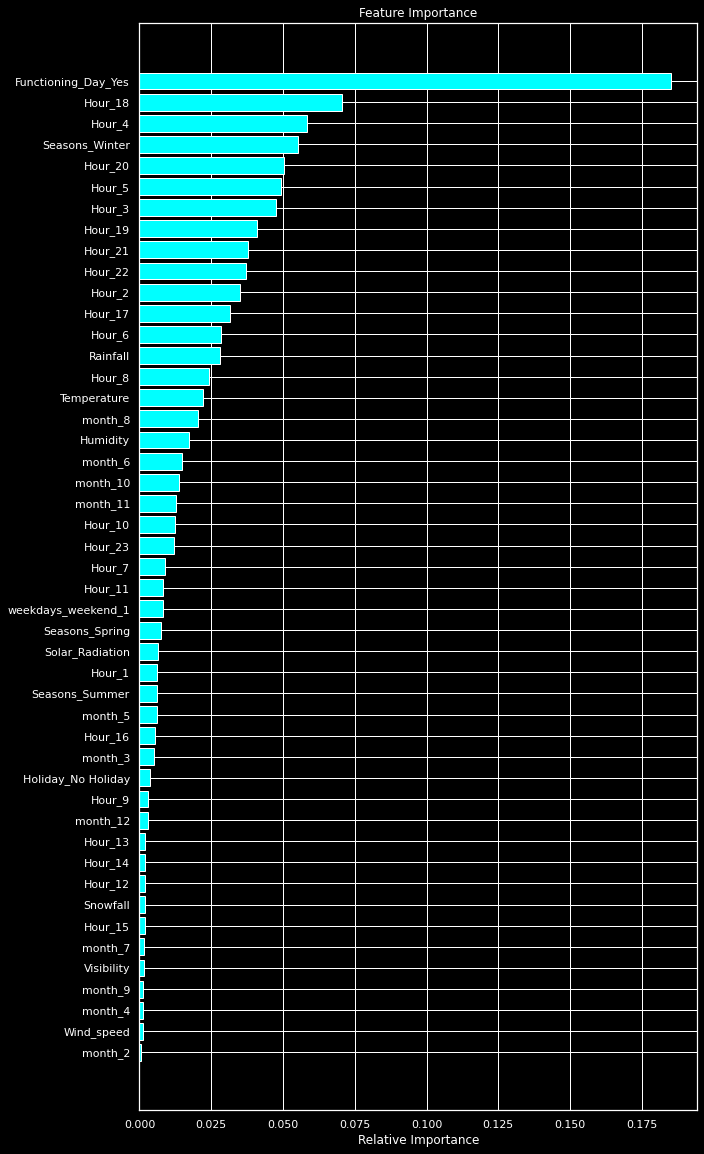

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='aqua', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

# **CONCLUSION**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE     R2  \
Training set 0          Linear regression   4.474  35.078  5.923  0.772   
             1            Lasso regression  7.255  91.594  9.570  0.405   
             2            Ridge regression  4.474  35.078  5.923  0.772   
             3       Elasticnet regression  5.792  57.574  7.588  0.626   
             4    Decision tree regression  5.357  53.079  7.286  0.655   
             5    Random forest regression  0.807   1.591  1.261  0.990   
             6         XG Boost Regression  3.288  18.940  4.352  0.877   
             7  XG boost regg GridserachCV  1.175   3.066  1.751  0.980   
Test set     0          Linear regression   4.410  33.275  5.768  0.789   
             1            Lasso regression  7.456  96.775  9.837  0.387   
             2            Ridge regression  4.410  33.277  5.769  0.789   
             3       Elasticnet regression  5.874  59.451  7.710  0.624   
             4    Decision tree regression  5.536  57.925  7.611  0.633   
             5    Random forest regression  2.227  12.861  3.586  0.919   
             6         XG Boost Regression  3.508  21.640  4.652  0.863   
             7  XG boost regg GridserachCV  2.203  11.147  3.339  0.929   

                Adj_R2  
Training set 0    0.77  
             1    0.39  
             2    0.77  
             3    0.62  
             4    0.65  
             5    0.99  
             6    0.87  
             7    0.98  
Test set     0    0.78  
             1    0.37  
             2    0.78  
             3    0.62  
             4    0.63  
             5    0.92  
             6    0.86  
             7    0.93



*    No overfitting is seen.
*   Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.

*   Feature Importance value for Random Forest and Gradient Boost are different.
*   We can deploy this model.

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.



